## Approach

## Setup Dependencies

In [301]:
import numpy as np
import pandas as pd
import math
import os
import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [29]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [277]:
# ML Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [446]:
import joblib

In [35]:
pd.set_option('display.max_columns',100)

## Importing Data & EDA

In [387]:
df = pd.read_excel('data.xlsx',sheet_name=1)
print(df.shape)

(26307, 73)


In [388]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [389]:
df.tail()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
26302,aj_26303,2019-03-10 13:08:03,2013,3,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,Yes,NaN,No,Alternator Brg Noise,Tappet Noise,NaN,NaN,NaN,NaN,Yes,NaN,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Electrical wiring Damaged,NaN,NaN,NaN,NaN,Petrol + CNG,64532,4.0
26303,aj_26304,2019-04-12 13:59:02,2007,8,No,Weak,NaN,NaN,NaN,NaN,No,Broken,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Loose,No,Alternator Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,Yes,NaN,No,Back Compression Exist,No,Hard,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,88051,4.0
26304,aj_26305,2019-02-28 10:42:53,2004,7,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Over heating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,Yes,NaN,Yes,NO Blow-by,No,Hard,Spongy,Low Pick Up,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol,22656,3.5
26305,aj_26306,2019-

In [390]:
df.isna().sum()

appointmentId                              0
inspectionStartTime                        0
year                                       0
month                                      0
engineTransmission_battery_value           0
                                       ...  
engineTransmission_comments_value_3    26248
engineTransmission_comments_value_4    26293
fuel_type                                  0
odometer_reading                           0
rating_engineTransmission                  0
Length: 73, dtype: int64

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

In [392]:
df.describe()

,inspectionStartTime,year,month,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_cc_value_10,odometer_reading,rating_engineTransmission
count,26307,26307.000000,26307.000000,0.0,0.0,26307.000000,26307.000000
mean,2019-02-24 04:17:07.174554624,2010.856578,5.462006,NaN,NaN,76460.143764,3.624663
min,2019-01-02 10:02:34,1989.000000,1.000000,NaN,NaN,1.000000,0.500000
25%,2019-01-29 13:54:15.500000,2008.000000,2.000000,NaN,NaN,46396.000000,3.500000
50%,2019-02-24 12:57:51,2011.000000,5.000000,NaN,NaN,72013.000000,4.000000
75%,2019-03-23 10:11:12.500000,2014.000000,9.000000,NaN,NaN,98289.500000,4.000000
max,2019-04-15 12:47:00,2019.000000,12.000000,NaN,NaN,999999.000000,5.000000
std,NaN,3.766234,3.583866,NaN,NaN,46762.524489,0.847645


In [393]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26307 entries, 0 to 26306
Data columns (total 73 columns):
 #   Column                                                     Non-Null Count  Dtype         
---  ------                                                     --------------  -----         
 0   appointmentId                                              26307 non-null  object        
 1   inspectionStartTime                                        26307 non-null  datetime64[ns]
 2   year                                                       26307 non-null  int64         
 3   month                                                      26307 non-null  int64         
 4   engineTransmission_battery_value                           26307 non-null  object        
 5   engineTransmission_battery_cc_value_0                      3438 non-null   object        
 6   engineTransmission_battery_cc_value_1                      430 non-null    object        
 7   engineTransmission_battery_cc_v

In [394]:
print('Missing Value % Check -\n')

for item in df.columns:
    if df[item].dtype == 'object':
        print(item, ':', round(df[item].isna().sum()/len(df)*100,2),'%')

Missing Value % Check -

appointmentId : 0.0 %
engineTransmission_battery_value : 0.0 %
engineTransmission_battery_cc_value_0 : 86.93 %
engineTransmission_battery_cc_value_1 : 98.37 %
engineTransmission_battery_cc_value_2 : 99.73 %
engineTransmission_battery_cc_value_3 : 99.94 %
engineTransmission_battery_cc_value_4 : 99.98 %
engineTransmission_engineoilLevelDipstick_value : 0.0 %
engineTransmission_engineOilLevelDipstick_cc_value_0 : 98.44 %
engineTransmission_engineOil : 0.0 %
engineTransmission_engineOil_cc_value_0 : 29.46 %
engineTransmission_engineOil_cc_value_1 : 58.17 %
engineTransmission_engineOil_cc_value_2 : 74.94 %
engineTransmission_engineOil_cc_value_3 : 85.78 %
engineTransmission_engineOil_cc_value_4 : 93.26 %
engineTransmission_engineOil_cc_value_5 : 97.69 %
engineTransmission_engineOil_cc_value_6 : 99.54 %
engineTransmission_engineOil_cc_value_7 : 99.96 %
engineTransmission_engineOil_cc_value_8 : 99.99 %
engineTransmission_engine_value : 0.0 %
engineTransmission_engine_

In [395]:
print('Missing Value % Check -\n')

for item in df.columns[1:]:
    if df[item].dtype == 'object':
        print(item,':')
        print(df[item].value_counts(),'\n')

Missing Value % Check -

engineTransmission_battery_value :
engineTransmission_battery_value
Yes    22869
No      3438
Name: count, dtype: int64 

engineTransmission_battery_cc_value_0 :
engineTransmission_battery_cc_value_0
Weak                         3097
Changed                       227
Jump Start                     55
Not Working                    39
Discharging light glowing      20
Name: count, dtype: int64 

engineTransmission_battery_cc_value_1 :
engineTransmission_battery_cc_value_1
Jump Start                   317
Not Working                   72
Changed                       32
Discharging light glowing      9
Name: count, dtype: int64 

engineTransmission_battery_cc_value_2 :
engineTransmission_battery_cc_value_2
Jump Start                   55
Changed                      10
Discharging light glowing     7
Name: count, dtype: int64 

engineTransmission_battery_cc_value_3 :
engineTransmission_battery_cc_value_3
Changed                      9
Discharging light glowing   

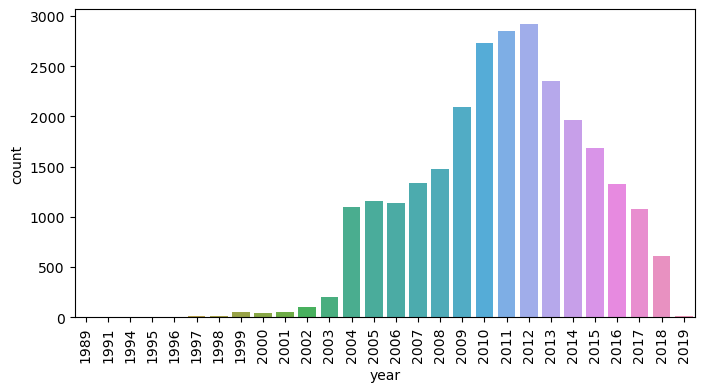

In [399]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='year')
plt.xticks(rotation=90)
plt.show()

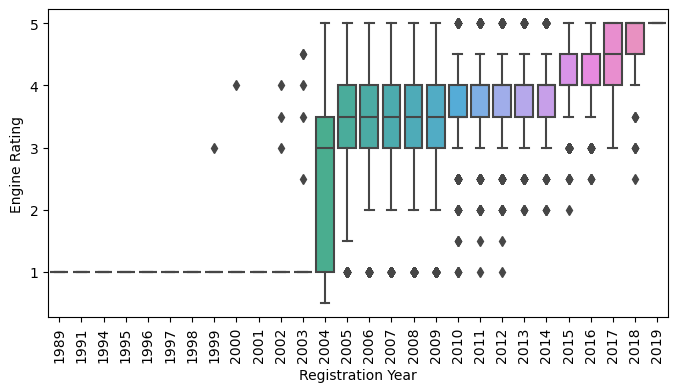

In [436]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['year'],y=df['rating_engineTransmission'])
plt.xticks(rotation=90)
plt.xlabel('Registration Year')
plt.ylabel('Engine Rating')
plt.show()

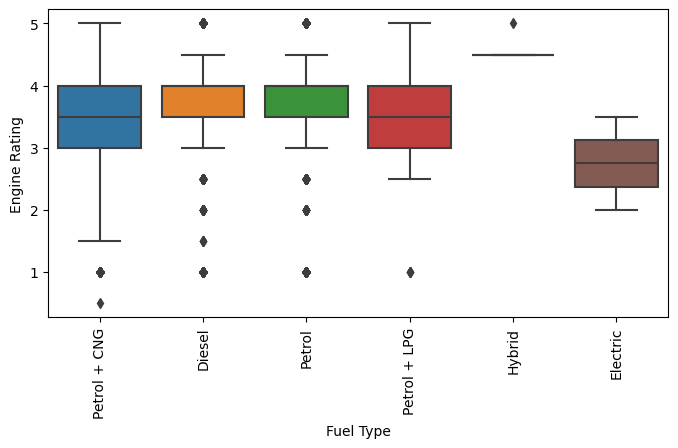

In [432]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['fuel_type'],y=df['rating_engineTransmission'])
plt.xticks(rotation=90)
plt.xlabel('Fuel Type')
plt.ylabel('Engine Rating')
plt.show()

C:\Users\shiva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


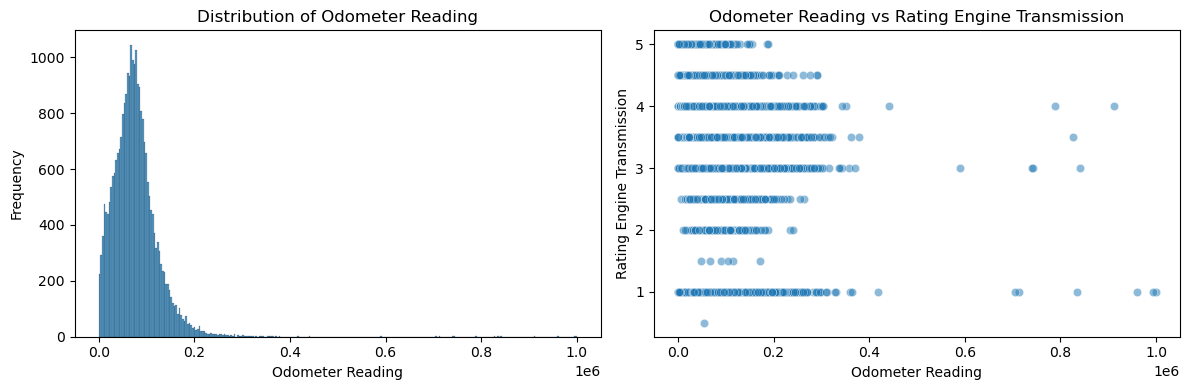

In [415]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.histplot(df['odometer_reading'], ax=plt.gca())
plt.title('Distribution of Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['odometer_reading'], y=df['rating_engineTransmission'], ax=plt.gca(), alpha=0.5)
plt.title('Odometer Reading vs Rating Engine Transmission')
plt.xlabel('Odometer Reading')
plt.ylabel('Rating Engine Transmission')

plt.tight_layout()
plt.show()

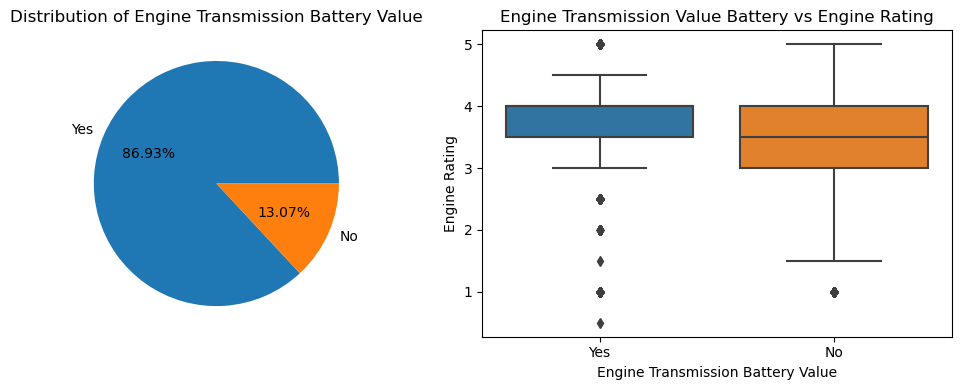

In [437]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
counts = df['engineTransmission_battery_value'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title('Distribution of Engine Transmission Battery Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['engineTransmission_battery_value'], y=df['rating_engineTransmission'], order=['Yes', 'No'], ax=plt.gca())
plt.title('Engine Transmission Value Battery vs Engine Rating')
plt.xlabel('Engine Transmission Battery Value')
plt.ylabel('Engine Rating')

plt.tight_layout()
plt.show()

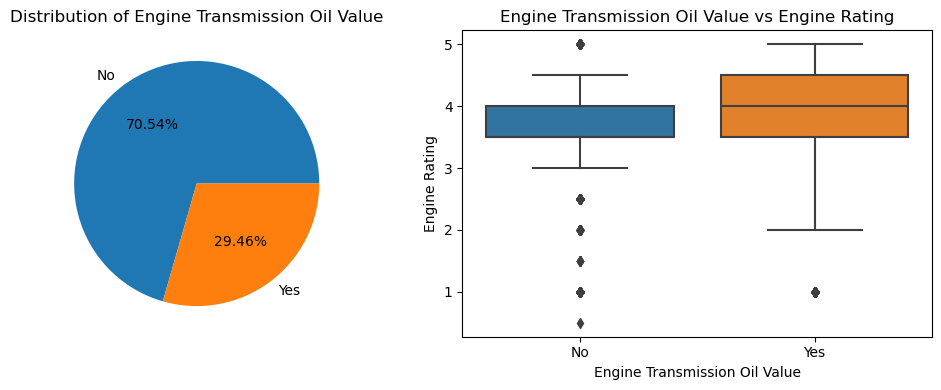

In [439]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
counts = df['engineTransmission_engineOil'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title('Distribution of Engine Transmission Oil Value')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['engineTransmission_engineOil'], y=df['rating_engineTransmission'], order=['No', 'Yes'], ax=plt.gca())
plt.title('Engine Transmission Oil Value vs Engine Rating')
plt.xlabel('Engine Transmission Oil Value')
plt.ylabel('Engine Rating')

plt.tight_layout()
plt.show()

## Checking Features Importance

In [440]:
df.head()

,appointmentId,inspectionStartTime,year,month,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission
0,aj_01,2019-02-03 15:43:48,2008,8,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0
1,aj_02,2019-01-16 13:02:12,2007,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0
2,aj_03,2019-02-09 13:31:04,2012,5,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,S

In [441]:
df['purchase_date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df['age_of_car_in_month_at_inspection'] = ((df['inspectionStartTime'].dt.year - df['purchase_date'].dt.year)*12 + (df['inspectionStartTime'].dt.month - df['purchase_date'].dt.month))

In [442]:
df.drop(columns=['purchase_date','appointmentId','inspectionStartTime','year','month'],inplace=True)

In [443]:
df.head()

,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,rating_engineTransmission,age_of_car_in_month_at_inspection
0,No,Weak,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,NaN,NaN,NaN,NaN,NaN,NaN,No,Repaired,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,No,White,No,Back Compression Exist,No,Spongy,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,Pickup Low,Starter Motor / Solenoid malfunctioning,NaN,NaN,NaN,Petrol + CNG,124600,3.0,126
1,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,NaN,NaN,NaN,NaN,NaN,No,RPM fluctuating,Misfiring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Leaking,Dirty,NaN,NaN,Yes,NaN,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,NaN,NaN,NaN,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Petrol + CNG,78108,4.0,140
2,Yes,NaN,NaN,NaN,NaN,NaN,Yes,NaN,No,Dirty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Dirty,NaN,NaN,NaN,No,Excess Vibration,No,Alternator Brg Noise,Engine Auxiliary Noise,NaN,NaN,NaN,NaN,No,Black,Yes,Perm. Blow By on idle,No,Hard,Spongy,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Diesel,93348,3.5,81
3,Yes,NaN,NaN,NaN,Na

In [444]:
x = df.drop(columns=['rating_engineTransmission'])
y = df['rating_engineTransmission']

numerical_columns = ['odometer_reading','age_of_car_in_month_at_inspection']
categorical_features = [item for item in x.columns if item not in numerical_columns]
x[categorical_features] = x[categorical_features].fillna('Missing')
x.head()

,engineTransmission_battery_value,engineTransmission_battery_cc_value_0,engineTransmission_battery_cc_value_1,engineTransmission_battery_cc_value_2,engineTransmission_battery_cc_value_3,engineTransmission_battery_cc_value_4,engineTransmission_engineoilLevelDipstick_value,engineTransmission_engineOilLevelDipstick_cc_value_0,engineTransmission_engineOil,engineTransmission_engineOil_cc_value_0,engineTransmission_engineOil_cc_value_1,engineTransmission_engineOil_cc_value_2,engineTransmission_engineOil_cc_value_3,engineTransmission_engineOil_cc_value_4,engineTransmission_engineOil_cc_value_5,engineTransmission_engineOil_cc_value_6,engineTransmission_engineOil_cc_value_7,engineTransmission_engineOil_cc_value_8,engineTransmission_engineOil_cc_value_9,engineTransmission_engine_value,engineTransmission_engine_cc_value_0,engineTransmission_engine_cc_value_1,engineTransmission_engine_cc_value_2,engineTransmission_engine_cc_value_3,engineTransmission_engine_cc_value_4,engineTransmission_engine_cc_value_5,engineTransmission_engine_cc_value_6,engineTransmission_engine_cc_value_7,engineTransmission_engine_cc_value_8,engineTransmission_engine_cc_value_9,engineTransmission_engine_cc_value_10,engineTransmission_coolant_value,engineTransmission_coolant_cc_value_0,engineTransmission_coolant_cc_value_1,engineTransmission_coolant_cc_value_2,engineTransmission_coolant_cc_value_3,engineTransmission_engineMounting_value,engineTransmission_engineMounting_cc_value_0,engineTransmission_engineSound_value,engineTransmission_engineSound_cc_value_0,engineTransmission_engineSound_cc_value_1,engineTransmission_engineSound_cc_value_2,engineTransmission_engineSound_cc_value_3,engineTransmission_engineSound_cc_value_4,engineTransmission_engineSound_cc_value_5,engineTransmission_exhaustSmoke_value,engineTransmission_exhaustSmoke_cc_value_0,engineTransmission_engineBlowByBackCompression_value,engineTransmission_engineBlowByBackCompression_cc_value_0,engineTransmission_clutch_value,engineTransmission_clutch_cc_value_0,engineTransmission_clutch_cc_value_1,engineTransmission_clutch_cc_value_2,engineTransmission_clutch_cc_value_3,engineTransmission_clutch_cc_value_4,engineTransmission_clutch_cc_value_5,engineTransmission_clutch_cc_value_6,engineTransmission_gearShifting_value,engineTransmission_gearShifting_cc_value_0,engineTransmission_gearShifting_cc_value_1,engineTransmission_gearShifting_cc_value_2,engineTransmission_comments_value_0,engineTransmission_comments_value_1,engineTransmission_comments_value_2,engineTransmission_comments_value_3,engineTransmission_comments_value_4,fuel_type,odometer_reading,age_of_car_in_month_at_inspection
0,No,Weak,Missing,Missing,Missing,Missing,Yes,Missing,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Missing,Missing,Missing,Missing,Missing,Missing,No,Repaired,Misfiring,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,No,Leaking,Dirty,Missing,Missing,No,Excess Vibration,No,Alternator Brg Noise,Water Pump Brg Noise,Timing Noise,Tappet Noise,Engine Auxiliary Noise,Missing,No,White,No,Back Compression Exist,No,Spongy,Missing,Missing,Missing,Missing,Missing,Missing,Yes,Missing,Missing,Missing,Pickup Low,Starter Motor / Solenoid malfunctioning,Missing,Missing,Missing,Petrol + CNG,124600,126
1,Yes,Missing,Missing,Missing,Missing,Missing,Yes,Missing,No,Leaking,Dirty,Leakage from Tappet Cover,Leakage from Side cover,Leakage from Sump/chamber,Missing,Missing,Missing,Missing,Missing,No,RPM fluctuating,Misfiring,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,No,Leaking,Dirty,Missing,Missing,Yes,Missing,No,Timing Noise,Tappet Noise,Engine Auxiliary Noise,Missing,Missing,Missing,No,Noise from silencer assembly,Yes,NO Blow-by,Yes,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Yes,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Petrol + CNG,78108,140
2,Yes,Missing,Missing,Missing,Missing,Missing,Yes,Missing,No,Dirty,Missing,Missing,Missing,Missing,Missing,

Learning rate set to 0.068636
0:	learn: 0.8120834	total: 169ms	remaining: 2m 48s
1:	learn: 0.7799549	total: 356ms	remaining: 2m 57s
2:	learn: 0.7498123	total: 551ms	remaining: 3m 3s
3:	learn: 0.7227217	total: 707ms	remaining: 2m 56s
4:	learn: 0.6992138	total: 871ms	remaining: 2m 53s
5:	learn: 0.6763577	total: 1.04s	remaining: 2m 52s
6:	learn: 0.6565719	total: 1.19s	remaining: 2m 49s
7:	learn: 0.6376521	total: 1.34s	remaining: 2m 45s
8:	learn: 0.6212654	total: 1.47s	remaining: 2m 41s
9:	learn: 0.6077430	total: 1.6s	remaining: 2m 38s
10:	learn: 0.5945184	total: 1.74s	remaining: 2m 36s
11:	learn: 0.5813565	total: 1.88s	remaining: 2m 35s
12:	learn: 0.5700099	total: 2.06s	remaining: 2m 36s
13:	learn: 0.5608873	total: 2.27s	remaining: 2m 39s
14:	learn: 0.5525089	total: 2.46s	remaining: 2m 41s
15:	learn: 0.5456802	total: 2.6s	remaining: 2m 39s
16:	learn: 0.5389298	total: 2.74s	remaining: 2m 38s
17:	learn: 0.5309183	total: 2.88s	remaining: 2m 37s
18:	learn: 0.5255028	total: 3.06s	remaining: 2m

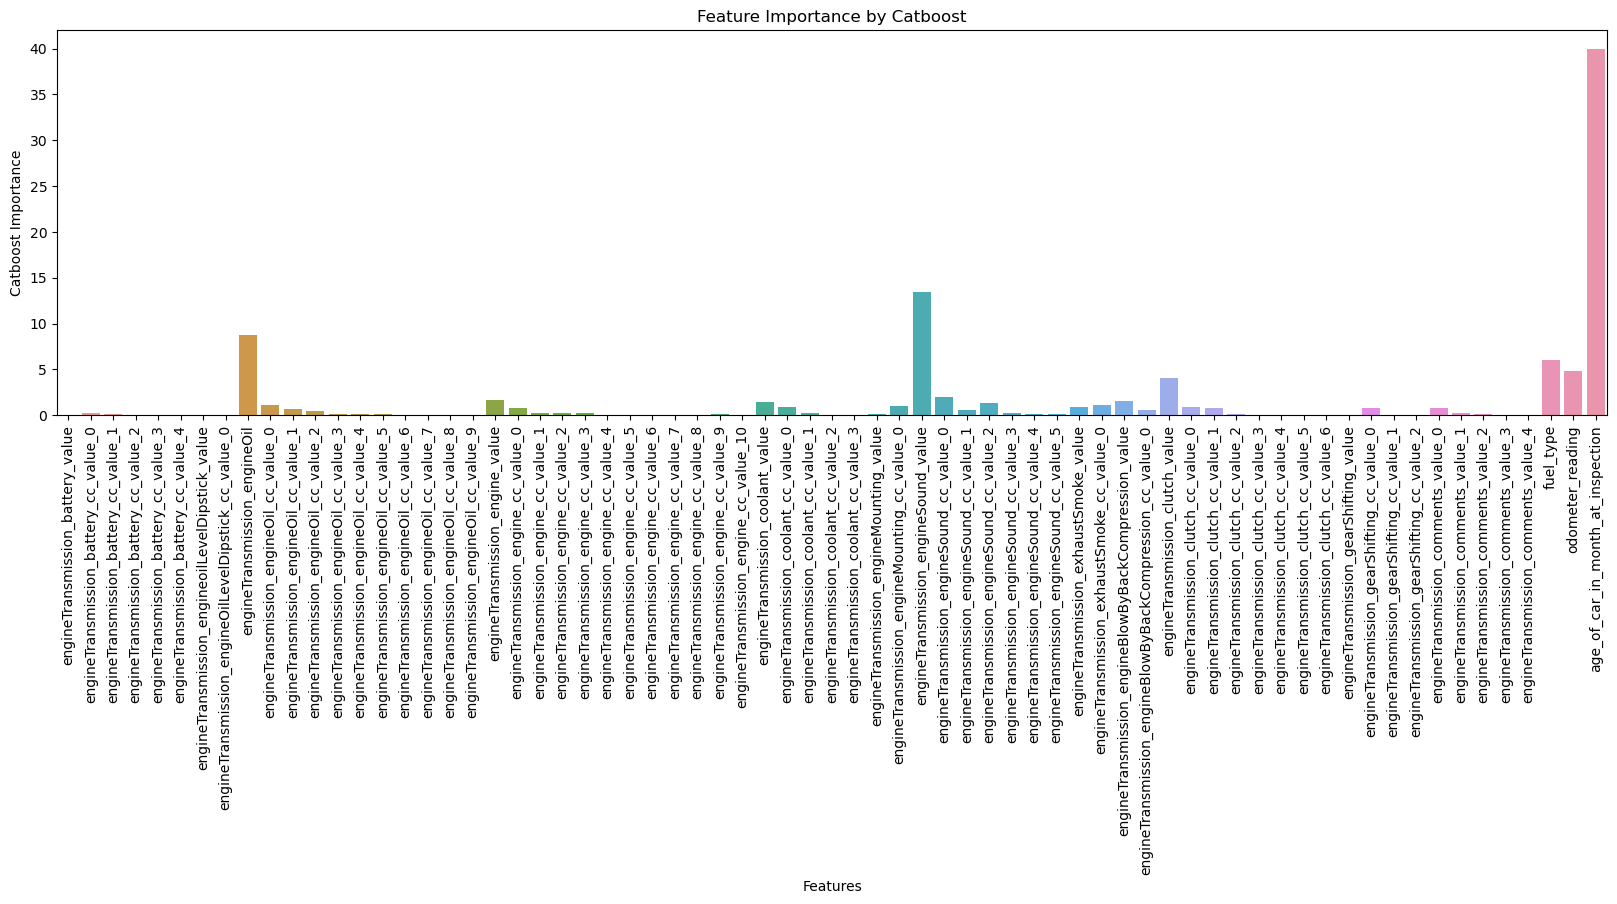

In [194]:
catboost_model = CatBoostRegressor()
catboost_model.fit(x, y, cat_features=categorical_features)

cat_importance = catboost_model.get_feature_importance()

plt.figure(figsize=(20,5))
sns.barplot(x=x.columns, y=cat_importance)

plt.xlabel('Features')
plt.ylabel('Catboost Importance')
plt.title('Feature Importance by Catboost')
plt.xticks(rotation=90)
plt.show()

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 802
[LightGBM] [Info] Number of data points in the train set: 26307, number of used features: 61
[LightGBM] [Info] Start training from score 3.624663


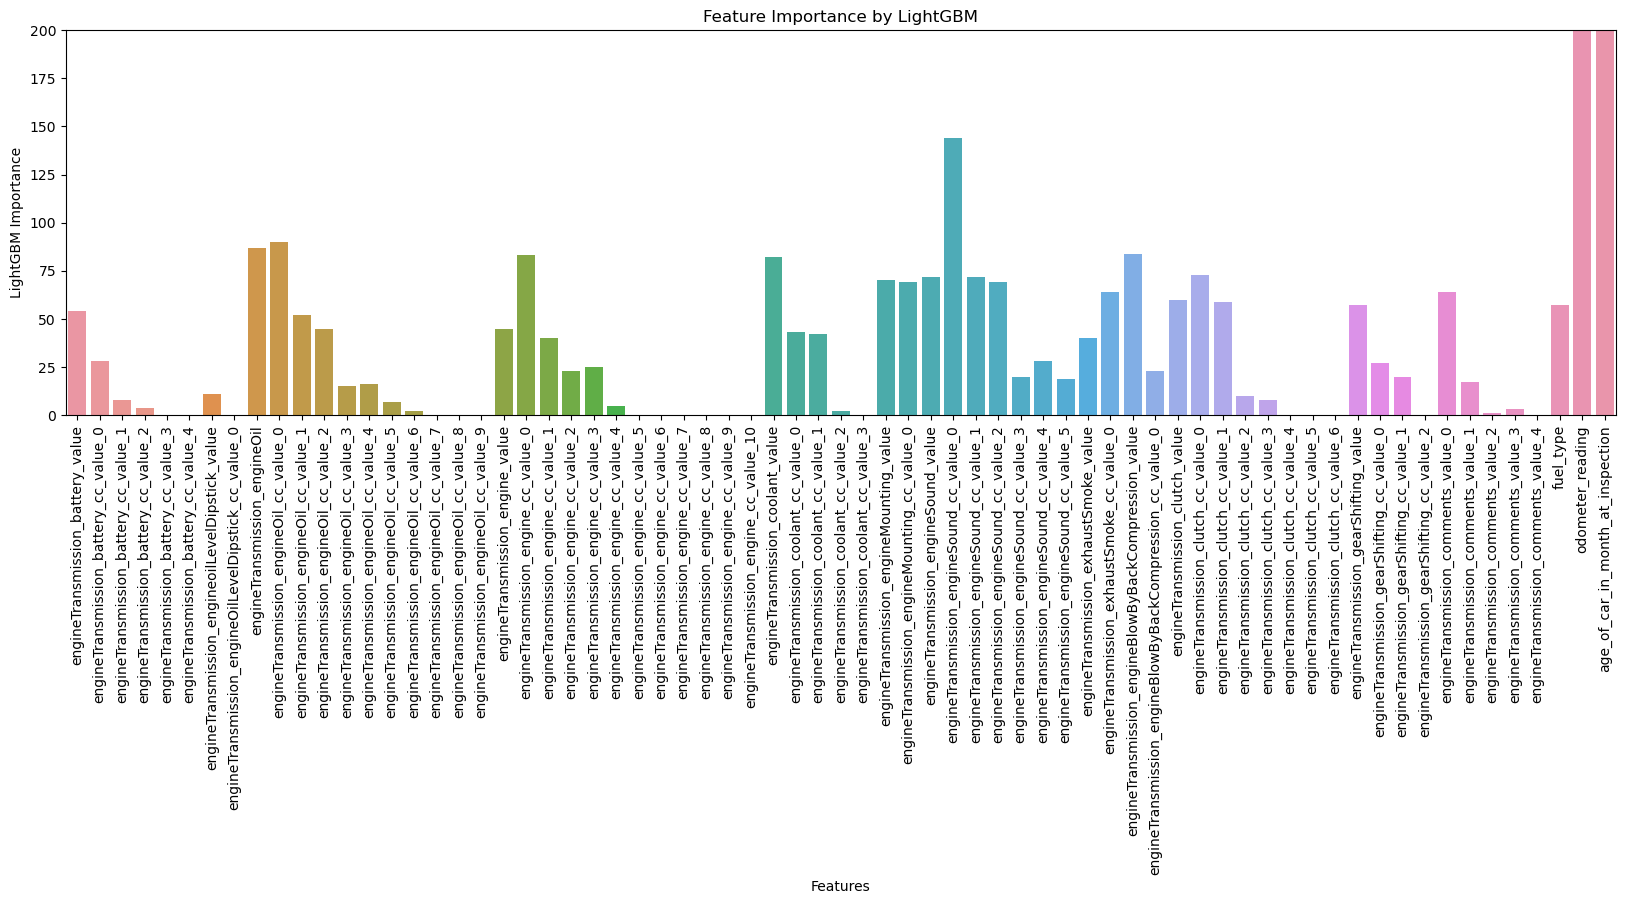

In [195]:
le = LabelEncoder()
x[categorical_features] = x[categorical_features].apply(lambda col: le.fit_transform(col))
x.head()

lgb_model = LGBMRegressor()
lgb_model.fit(x, y)
lgb_importance = lgb_model.feature_importances_

plt.figure(figsize=(20,5))
sns.barplot(x=x.columns, y=lgb_importance)

plt.xlabel('Features')
plt.ylabel('LightGBM Importance')
plt.title('Feature Importance by LightGBM')
plt.xticks(rotation=90)
plt.ylim(0, 200)
plt.show()

100%|===================| 26302/26307 [74:13<00:00]        

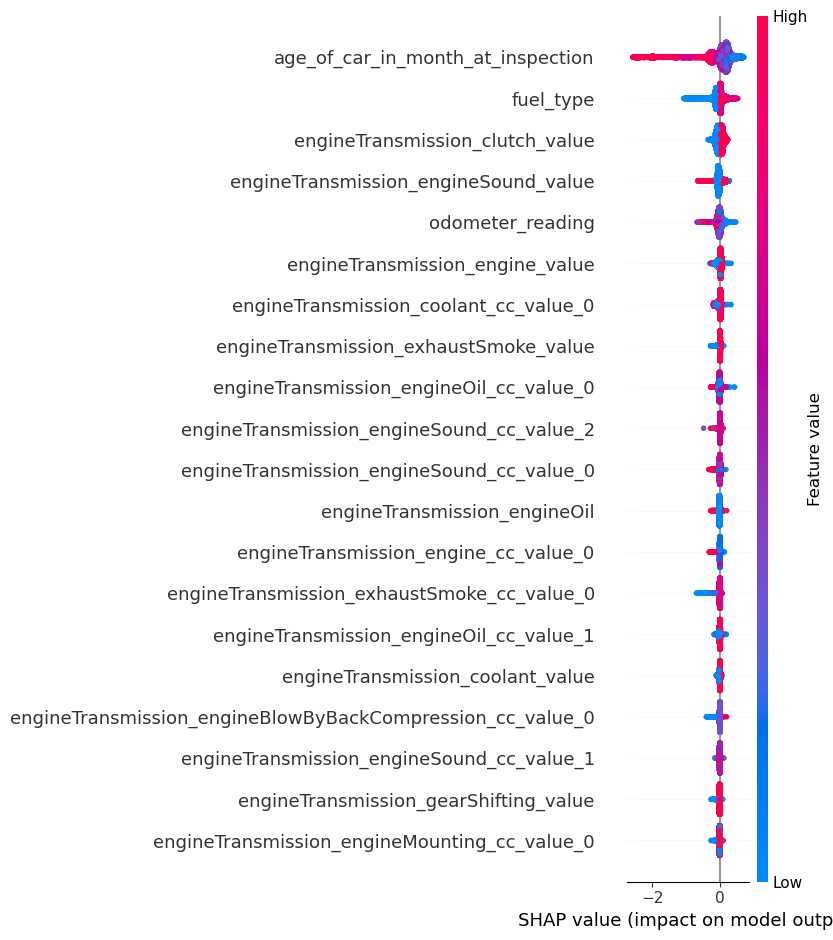

In [196]:
import shap
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(x, y)
explainer = shap.Explainer(rf_model, x)
shap_values = explainer(x)
shap.summary_plot(shap_values, x)

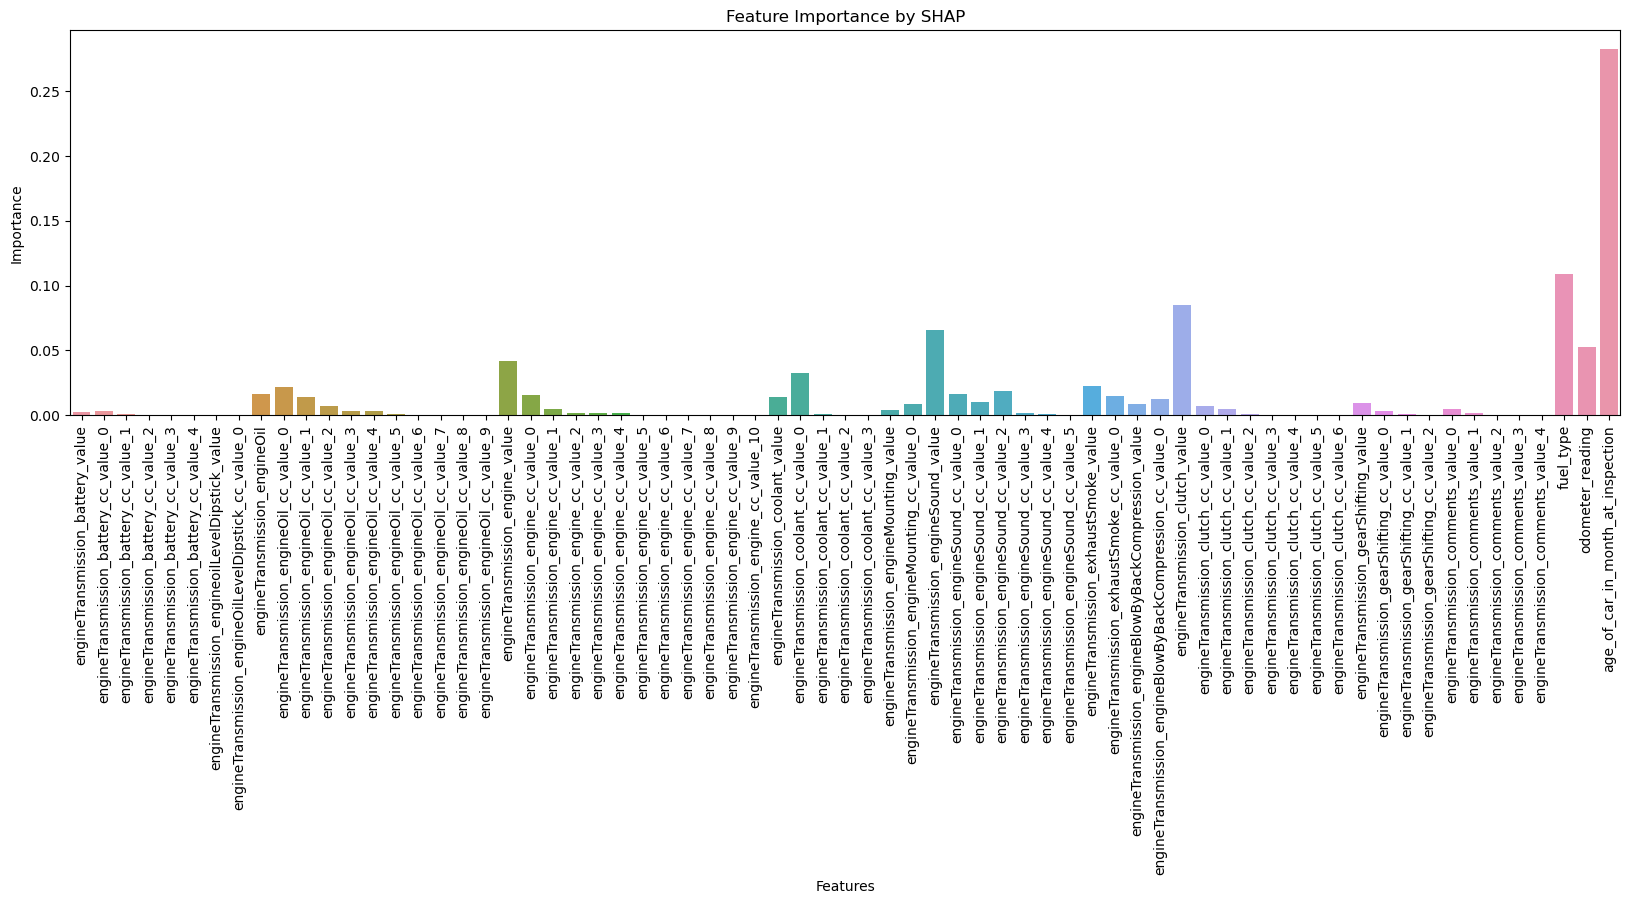

In [197]:
# shap.summary_plot(shap_values, x, plot_type="bar")
shap_importance = np.mean(np.abs(shap_values.values), axis=0)

plt.figure(figsize=(20,5))
sns.barplot(x=x.columns, y=shap_importance)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance by SHAP')
plt.xticks(rotation=90)
plt.show()

In [250]:
data = pd.DataFrame({
    'features': x.columns,
    'imp1': cat_importance,
    'imp2': lgb_importance,
    'imp3': shap_importance
})

# Get top 2 students for each subject
imp1 = data.nlargest(40, 'imp1')['features'] 
imp2 = data.nlargest(40, 'imp2')['features'] 
imp3 = data.nlargest(40, 'imp3')['features'] 

# Combine all top students from each subject into one set (to avoid duplicates)
f = set(imp1).union(set(imp2)).union(set(imp3))

# Filter the original list of students to keep only those who are in the top_students_set
imp_features = [item for item in x.columns if item in f]
print('No of Important Features : ',len(imp_features))
imp_features

No of Important Features :  45


['engineTransmission_battery_value',
 'engineTransmission_battery_cc_value_0',
 'engineTransmission_battery_cc_value_1',
 'engineTransmission_engineOil',
 'engineTransmission_engineOil_cc_value_0',
 'engineTransmission_engineOil_cc_value_1',
 'engineTransmission_engineOil_cc_value_2',
 'engineTransmission_engineOil_cc_value_3',
 'engineTransmission_engineOil_cc_value_4',
 'engineTransmission_engineOil_cc_value_5',
 'engineTransmission_engine_value',
 'engineTransmission_engine_cc_value_0',
 'engineTransmission_engine_cc_value_1',
 'engineTransmission_engine_cc_value_2',
 'engineTransmission_engine_cc_value_3',
 'engineTransmission_engine_cc_value_4',
 'engineTransmission_coolant_value',
 'engineTransmission_coolant_cc_value_0',
 'engineTransmission_coolant_cc_value_1',
 'engineTransmission_engineMounting_value',
 'engineTransmission_engineMounting_cc_value_0',
 'engineTransmission_engineSound_value',
 'engineTransmission_engineSound_cc_value_0',
 'engineTransmission_engineSound_cc_valu

In [251]:
len(imp_features)

45

## Feature Label Split

In [252]:
X = df[imp_features]
Y = df['rating_engineTransmission']
print(X.shape,Y.shape)

(26307, 45) (26307,)


## Train-Test Split

In [254]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=1)
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(21045, 45) (5262, 45)
(21045,) (5262,)


## Columns Transformation

In [255]:
columns_to_encode = x_train.columns[:-2]
x_train.columns

Index(['engineTransmission_battery_value',
       'engineTransmission_battery_cc_value_0',
       'engineTransmission_battery_cc_value_1', 'engineTransmission_engineOil',
       'engineTransmission_engineOil_cc_value_0',
       'engineTransmission_engineOil_cc_value_1',
       'engineTransmission_engineOil_cc_value_2',
       'engineTransmission_engineOil_cc_value_3',
       'engineTransmission_engineOil_cc_value_4',
       'engineTransmission_engineOil_cc_value_5',
       'engineTransmission_engine_value',
       'engineTransmission_engine_cc_value_0',
       'engineTransmission_engine_cc_value_1',
       'engineTransmission_engine_cc_value_2',
       'engineTransmission_engine_cc_value_3',
       'engineTransmission_engine_cc_value_4',
       'engineTransmission_coolant_value',
       'engineTransmission_coolant_cc_value_0',
       'engineTransmission_coolant_cc_value_1',
       'engineTransmission_engineMounting_value',
       'engineTransmission_engineMounting_cc_value_0',
       '

In [256]:
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', 
         Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value='Missing')), 
                         ('onehot', OneHotEncoder(drop='first', sparse_output=False)) ]), 
         columns_to_encode), 
        
        ('standardize', StandardScaler(), ['odometer_reading','age_of_car_in_month_at_inspection'])  # Example column
    ]
)

In [257]:
x_train_transformed = preprocessor.fit_transform(x_train)

In [259]:
x_train_transformed.shape

(21045, 203)

In [282]:
onehot_encoded_columns = preprocessor.named_transformers_['onehot'].named_steps['onehot'].get_feature_names_out(columns_to_encode)
final_columns = list(onehot_encoded_columns) + ['odometer_reading','age_of_car_in_month_at_inspection'] 

In [283]:
len(final_columns)

203

## Model Selection Using Cross Validation

In [284]:
model1 = LinearRegression()
model2 = SVR()
model3 = DecisionTreeRegressor()
model4 = RandomForestRegressor(n_jobs=-1)
model5 = GradientBoostingRegressor()
model6 = XGBRegressor()
model7 = CatBoostRegressor()
model8 = LGBMRegressor()

In [285]:
# LinearRegression
cv_scores = cross_val_score(model1, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  2421128229.657378 [6.34444025e-01 6.42763833e-01 6.42312869e-01 5.41173572e+09
 1.49753193e+08]


In [286]:
# SVM
cv_scores = cross_val_score(model2, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  0.4836016796383916 [0.48080291 0.48358685 0.48244298 0.49024975 0.48086297]


In [287]:
# Decision Tree
cv_scores = cross_val_score(model3, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  0.612183267925671 [0.61171737 0.61365626 0.60335838 0.62829081 0.60355524]


In [288]:
# Random Forest
cv_scores = cross_val_score(model4, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  0.4464083495946151 [0.44199302 0.45071037 0.44008714 0.46290184 0.43583208]


In [289]:
# Gradient Boost
cv_scores = cross_val_score(model5, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  0.47172581223768856 [0.4742702  0.47274598 0.46409464 0.48342562 0.46381145]


In [290]:
# XGBoost
cv_scores = cross_val_score(model6, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Mean RMSE :  0.4435250148582683 [0.44862855 0.44719966 0.43606718 0.45356056 0.43179313]


In [291]:
# Catboost
cv_scores = cross_val_score(model7, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

Learning rate set to 0.063962
0:	learn: 0.8181185	total: 14.6ms	remaining: 14.6s
1:	learn: 0.7874806	total: 28.1ms	remaining: 14s
2:	learn: 0.7589265	total: 41.6ms	remaining: 13.8s
3:	learn: 0.7352398	total: 54.4ms	remaining: 13.6s
4:	learn: 0.7113845	total: 77.1ms	remaining: 15.3s
5:	learn: 0.6899208	total: 88.6ms	remaining: 14.7s
6:	learn: 0.6694942	total: 102ms	remaining: 14.4s
7:	learn: 0.6530678	total: 116ms	remaining: 14.4s
8:	learn: 0.6360112	total: 132ms	remaining: 14.5s
9:	learn: 0.6208213	total: 145ms	remaining: 14.3s
10:	learn: 0.6065391	total: 154ms	remaining: 13.8s
11:	learn: 0.5936592	total: 162ms	remaining: 13.3s
12:	learn: 0.5823611	total: 169ms	remaining: 12.9s
13:	learn: 0.5734485	total: 178ms	remaining: 12.6s
14:	learn: 0.5634454	total: 196ms	remaining: 12.9s
15:	learn: 0.5554945	total: 207ms	remaining: 12.7s
16:	learn: 0.5478627	total: 217ms	remaining: 12.6s
17:	learn: 0.5414872	total: 228ms	remaining: 12.5s
18:	learn: 0.5362800	total: 240ms	remaining: 12.4s
19:	lea

In [292]:
# LightGBM
cv_scores = cross_val_score(model8, x_train_transformed, y_train, cv=5, scoring='neg_mean_squared_error')
print('Mean RMSE : ',(-cv_scores.mean())**0.5, (-cv_scores)**0.5)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 166
[LightGBM] [Info] Start training from score 3.618912
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005914 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 805
[LightGBM] [Info] Number of data points in the train set: 16836, number of used features: 167
[LightGBM] [Info] Start training from score 3.630494
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enoug

## Hyperparameter Tuning - Grid Search CV

In [306]:
model_check = LGBMRegressor()

param_grid = {
    'n_estimators': [100, 200, 300], 
    'learning_rate': [0.05, 0.1, 0.2],     
    'max_depth': [5, 8, -1],                 
    'num_leaves': [20, 31, 50],           
    # 'min_child_samples': [10, 20, 30],      
    # 'subsample': [0.6, 0.8, 1.0],          
    # 'reg_alpha': [0, 0.1],               
    # 'reg_lambda': [0, 0.1],    
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=model_check, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(x_train_transformed, y_train)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012931 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 171
[LightGBM] [Info] Start training from score 3.622286
Best parameters found:  {'learning_rate': 0.05, 'max_depth': -1, 'max_features': 'auto', 'n_estimators': 200, 'num_leaves': 50}


In [310]:
print("Best paramters score : ",(-grid_search.best_score_)**0.5)

Best paramters score :  0.4301250317045054


## Model Training

In [313]:
model = LGBMRegressor( n_estimators=200,
                        learning_rate=0.05, 
                         max_depth=-1,
                        num_leaves=50,
                        max_features='auto' )

model.fit(x_train_transformed, y_train)

[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010380 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 819
[LightGBM] [Info] Number of data points in the train set: 21045, number of used features: 171
[LightGBM] [Info] Start training from score 3.622286


LGBMRegressor(learning_rate=0.05, max_features='auto', n_estimators=200,
              num_leaves=50)

In [361]:
y_pred = model.predict(x_train_transformed)
y_true = y_train

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Root Mean Squared Error: ',rmse)
print('Mean Absolute Error :',mae)
print('R² Score: ',r2)

[LightGBM] [Warning] Unknown parameter: max_features
Root Mean Squared Error:  0.374135904023488
Mean Absolute Error : 0.2832300541347247
R² Score:  0.8058575257897592


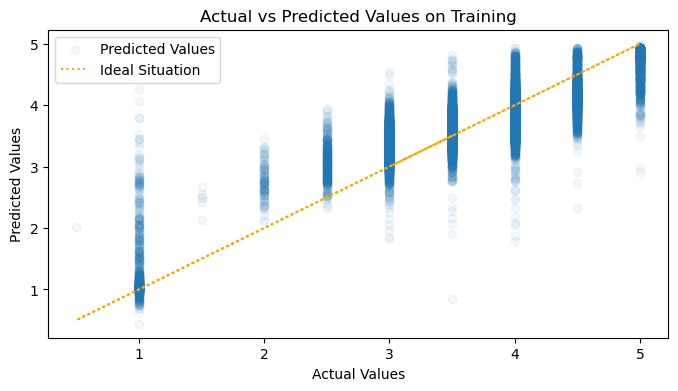

In [362]:
plt.figure(figsize=(8, 4))
plt.scatter(y_true, y_pred, alpha=0.05, label='Predicted Values')
plt.plot(y_true, y_true, linestyle=':', color='orange', label='Ideal Situation')
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Training')
plt.show()

## Model Testing & Evaluation

In [445]:
x_test_transformed= preprocessor.transform(x_test)

In [366]:
y_pred = model.predict(x_test_transformed)
y_true = y_test

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Root Mean Squared Error: ',rmse)
print('Mean Absolute Error :',mae)
print('R² Score: ',r2)

[LightGBM] [Warning] Unknown parameter: max_features
Root Mean Squared Error:  0.42918973258134263
Mean Absolute Error : 0.32107838134230904
R² Score:  0.7399144859014359


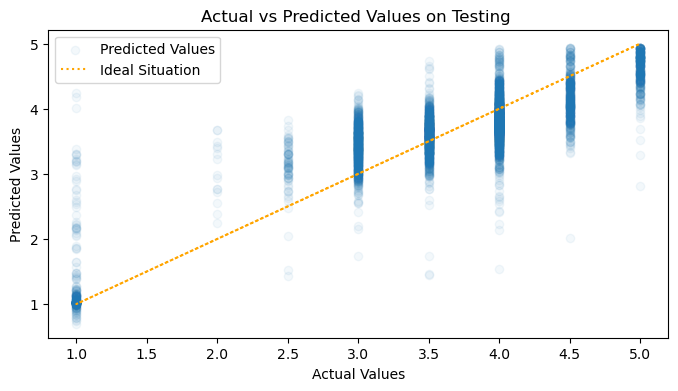

In [367]:
plt.figure(figsize=(8, 4))
plt.scatter(y_true, y_pred, alpha=0.05, label='Predicted Values')
plt.plot(y_true, y_true, linestyle=':', color='orange', label='Ideal Situation')
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values on Testing ')
plt.show()

## Outlier Detection

### Outliersin Trainig Data

In [459]:
y_pred = model.predict(x_train_transformed)
y_true = y_train

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Root Mean Squared Error: ',rmse)
print('Mean Absolute Error :',mae)
print('R² Score: ',r2)

[LightGBM] [Warning] Unknown parameter: max_features
Root Mean Squared Error:  0.374135904023488
Mean Absolute Error : 0.2832300541347247
R² Score:  0.8058575257897592


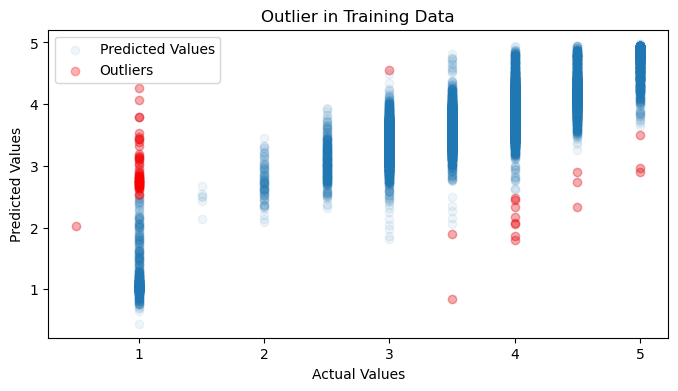

In [460]:
plt.figure(figsize=(8, 4))
plt.scatter(y_true, y_pred, alpha=0.07, label='Predicted Values')
# plt.plot(y_true, y_true, linestyle=':', color='lightgreen', label='Ideal Situation')

y_true = np.array(y_true)
gap = y_pred - y_true
highlight_indices = np.where(np.abs(gap) > 1.5)[0]
plt.scatter(y_true[highlight_indices], y_pred[highlight_indices], color='red', label='Outliers', alpha=0.3)
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Outlier in Training Data')
plt.show()

### Outliers in Testing Data

In [461]:
y_pred = model.predict(x_test_transformed)
y_true = y_test

mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse) 
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print('Root Mean Squared Error: ',rmse)
print('Mean Absolute Error :',mae)
print('R² Score: ',r2)

[LightGBM] [Warning] Unknown parameter: max_features
Root Mean Squared Error:  0.42918973258134263
Mean Absolute Error : 0.32107838134230904
R² Score:  0.7399144859014359


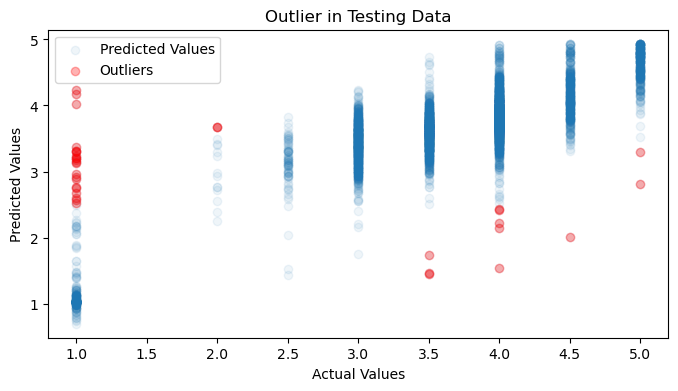

In [462]:
plt.figure(figsize=(8, 4))
plt.scatter(y_true, y_pred, alpha=0.07, label='Predicted Values')
# plt.plot(y_true, y_true, linestyle=':', color='lightgreen', label='Ideal Situation')

y_true = np.array(y_true)
gap = y_pred - y_true
highlight_indices = np.where(np.abs(gap) > 1.5)[0]
plt.scatter(y_true[highlight_indices], y_pred[highlight_indices], color='red', label='Outliers', alpha=0.3)
plt.legend()
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Outlier in Testing Data')
plt.show()

## Saving the Model

In [463]:
joblib.dump(preprocessor, 'Preprocessor.pkl')
print('Preprocessor Saved')

joblib.dump(model, 'LGBM_Engine_Rating_Prediction_Model.pkl')
print('Model Saved')

Preprocessor Saved
Model Saved


## Summary